## Car data scraping

The data used in this notebook was scraped from nettiauto.com. The data includes information about circa 30,000 cars for sale. The plots in the notebook have been created for illustration purposes only. The scraping was done using scrapy, and the code used can be seen [here](https://github.com/pekkajauhi/python/blob/master/carspider.py). The dataset is available in my [google drive](https://drive.google.com/file/d/1YKPcgJIdpQz5wNugIHdv3JnqSYsZySBV/view?usp=sharing). And the [cleaned dataset](https://drive.google.com/open?id=1Nm7H8ZCMur8JKT5gMfJwv9Zuktyz0I3f) is available as well.

In [1]:
import pandas as pd

In [206]:
df = pd.read_excel("/home/pekka/carscraper/cars_data_3000.xlsx")

In [207]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta
0,Mercedes-Benz,220,1996,600 000 km,"2.2 l, Diesel",Automaatti,NaN,NaN,NaN,NaN,NaN,300 €
1,Ford,Mondeo,1998 (ensirek. 11-1998),330 000 km,"1.8 l, Bensiini",Manuaali,85 kW / 116 Hv,190 km/h,"11,40 s",7.4 l/100km,1 322 kg,300 €
2,Citroen,C5,2004,288 000 km,"1.8 l, Bensiini",Manuaali,NaN,NaN,NaN,NaN,NaN,300 €
3,Nissan,Primera,1999 (ensirek. 3-1999),197 103 km,"1.6 l, Bensiini",Manuaali,73 kW / 99 Hv,200 km/h,"10,00 s",10.0 l/100km,1 275 kg,300 €
4,Renault,Laguna,1998 (ensirek. 3-1998),210 000 km,"2.0 l, Bensiini",Manuaali,84 kW / 114 Hv,200 km/h,"10,00 s",8.9 l/100km,1 340 kg,300 €


In [210]:
df['Vuosimalli'][3]


'1999\xa0(ensirek. 3-1999)'

In [212]:
df['Vuosimalli'] = [str(x)[:4] for x in df['Vuosimalli']]

In [213]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta
0,Mercedes-Benz,220,1996,600 000 km,"2.2 l, Diesel",Automaatti,NaN,NaN,NaN,NaN,NaN,300 €
1,Ford,Mondeo,1998,330 000 km,"1.8 l, Bensiini",Manuaali,85 kW / 116 Hv,190 km/h,"11,40 s",7.4 l/100km,1 322 kg,300 €
2,Citroen,C5,2004,288 000 km,"1.8 l, Bensiini",Manuaali,NaN,NaN,NaN,NaN,NaN,300 €
3,Nissan,Primera,1999,197 103 km,"1.6 l, Bensiini",Manuaali,73 kW / 99 Hv,200 km/h,"10,00 s",10.0 l/100km,1 275 kg,300 €
4,Renault,Laguna,1998,210 000 km,"2.0 l, Bensiini",Manuaali,84 kW / 114 Hv,200 km/h,"10,00 s",8.9 l/100km,1 340 kg,300 €


In [216]:
df['Moottorin tilavuus'] = [str(x).split(',')[0] for x in df['Moottori']]

In [217]:
df.Moottori.value_counts()

2.0 l, Diesel                      3591
1.6 l, Bensiini                    3414
2.0 l, Bensiini                    2957
1.8 l, Bensiini                    2196
1.9 l, Diesel                      1767
1.4 l, Bensiini                    1553
1.6 l, Diesel                      1368
2.5 l, Diesel                      1276
2.2 l, Diesel                      1011
2.4 l, Bensiini                     953
2.4 l, Diesel                       793
2.1 l, Diesel                       757
1.2 l, Bensiini                     736
3.0 l, Diesel                       590
1.3 l, Bensiini                     573
2.5 l, Bensiini                     548
2.3 l, Bensiini                     370
2.7 l, Diesel                       319
1.0 l, Bensiini                     318
1.5 l, Bensiini                     304
1.8 l, Diesel                       303
2.2 l, Bensiini                     282
1.4 l, Diesel                       250
2.9 l, Diesel                       238
1.5 l, Diesel                       230


In [218]:
[print(x) for x in df['Moottori'] if type(x) == float]

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [219]:
df.Moottori.isnull().sum()


32

In [220]:
df["Moottori"].fillna("Ei ilmoitettu,Ei ilmoitettu", inplace = True)

In [221]:
df.Moottori.isnull().sum()

0

In [222]:
df['Moottorin tilavuus'] = [x.split(',')[0] for x in df['Moottori']]

In [223]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus
0,Mercedes-Benz,220,1996,600 000 km,"2.2 l, Diesel",Automaatti,NaN,NaN,NaN,NaN,NaN,300 €,2.2 l
1,Ford,Mondeo,1998,330 000 km,"1.8 l, Bensiini",Manuaali,85 kW / 116 Hv,190 km/h,"11,40 s",7.4 l/100km,1 322 kg,300 €,1.8 l
2,Citroen,C5,2004,288 000 km,"1.8 l, Bensiini",Manuaali,NaN,NaN,NaN,NaN,NaN,300 €,1.8 l
3,Nissan,Primera,1999,197 103 km,"1.6 l, Bensiini",Manuaali,73 kW / 99 Hv,200 km/h,"10,00 s",10.0 l/100km,1 275 kg,300 €,1.6 l
4,Renault,Laguna,1998,210 000 km,"2.0 l, Bensiini",Manuaali,84 kW / 114 Hv,200 km/h,"10,00 s",8.9 l/100km,1 340 kg,300 €,2.0 l


In [224]:
df['Polttoaine'] = [x.split(',')[1] for x in df['Moottori']]

In [225]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus,Polttoaine
0,Mercedes-Benz,220,1996,600 000 km,"2.2 l, Diesel",Automaatti,NaN,NaN,NaN,NaN,NaN,300 €,2.2 l,Diesel
1,Ford,Mondeo,1998,330 000 km,"1.8 l, Bensiini",Manuaali,85 kW / 116 Hv,190 km/h,"11,40 s",7.4 l/100km,1 322 kg,300 €,1.8 l,Bensiini
2,Citroen,C5,2004,288 000 km,"1.8 l, Bensiini",Manuaali,NaN,NaN,NaN,NaN,NaN,300 €,1.8 l,Bensiini
3,Nissan,Primera,1999,197 103 km,"1.6 l, Bensiini",Manuaali,73 kW / 99 Hv,200 km/h,"10,00 s",10.0 l/100km,1 275 kg,300 €,1.6 l,Bensiini
4,Renault,Laguna,1998,210 000 km,"2.0 l, Bensiini",Manuaali,84 kW / 114 Hv,200 km/h,"10,00 s",8.9 l/100km,1 340 kg,300 €,2.0 l,Bensiini


In [226]:
df.Teho.isnull().sum()

2409

In [227]:
df["Teho"].fillna("Ei ilmoitettu/Ei ilmoitettu", inplace = True)

In [228]:
df.Teho.isnull().sum()

0

In [229]:
df['Teho/kW'] = [x.split('/')[0] for x in df['Teho']]

In [230]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus,Polttoaine,Teho/kW
0,Mercedes-Benz,220,1996,600 000 km,"2.2 l, Diesel",Automaatti,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300 €,2.2 l,Diesel,Ei ilmoitettu
1,Ford,Mondeo,1998,330 000 km,"1.8 l, Bensiini",Manuaali,85 kW / 116 Hv,190 km/h,"11,40 s",7.4 l/100km,1 322 kg,300 €,1.8 l,Bensiini,85 kW
2,Citroen,C5,2004,288 000 km,"1.8 l, Bensiini",Manuaali,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300 €,1.8 l,Bensiini,Ei ilmoitettu
3,Nissan,Primera,1999,197 103 km,"1.6 l, Bensiini",Manuaali,73 kW / 99 Hv,200 km/h,"10,00 s",10.0 l/100km,1 275 kg,300 €,1.6 l,Bensiini,73 kW
4,Renault,Laguna,1998,210 000 km,"2.0 l, Bensiini",Manuaali,84 kW / 114 Hv,200 km/h,"10,00 s",8.9 l/100km,1 340 kg,300 €,2.0 l,Bensiini,84 kW


In [231]:
df['Teho/hv'] = [x.split('/')[1] for x in df['Teho']]

In [232]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus,Polttoaine,Teho/kW,Teho/hv
0,Mercedes-Benz,220,1996,600 000 km,"2.2 l, Diesel",Automaatti,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300 €,2.2 l,Diesel,Ei ilmoitettu,Ei ilmoitettu
1,Ford,Mondeo,1998,330 000 km,"1.8 l, Bensiini",Manuaali,85 kW / 116 Hv,190 km/h,"11,40 s",7.4 l/100km,1 322 kg,300 €,1.8 l,Bensiini,85 kW,116 Hv
2,Citroen,C5,2004,288 000 km,"1.8 l, Bensiini",Manuaali,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300 €,1.8 l,Bensiini,Ei ilmoitettu,Ei ilmoitettu
3,Nissan,Primera,1999,197 103 km,"1.6 l, Bensiini",Manuaali,73 kW / 99 Hv,200 km/h,"10,00 s",10.0 l/100km,1 275 kg,300 €,1.6 l,Bensiini,73 kW,99 Hv
4,Renault,Laguna,1998,210 000 km,"2.0 l, Bensiini",Manuaali,84 kW / 114 Hv,200 km/h,"10,00 s",8.9 l/100km,1 340 kg,300 €,2.0 l,Bensiini,84 kW,114 Hv


In [233]:
df['Mittarilukema'] = df['Mittarilukema'].str.replace('km', '')

In [234]:
df['Mittarilukema'] = df['Mittarilukema'].str.replace(' ', '')

In [235]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus,Polttoaine,Teho/kW,Teho/hv
0,Mercedes-Benz,220,1996,600000,"2.2 l, Diesel",Automaatti,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300 €,2.2 l,Diesel,Ei ilmoitettu,Ei ilmoitettu
1,Ford,Mondeo,1998,330000,"1.8 l, Bensiini",Manuaali,85 kW / 116 Hv,190 km/h,"11,40 s",7.4 l/100km,1 322 kg,300 €,1.8 l,Bensiini,85 kW,116 Hv
2,Citroen,C5,2004,288000,"1.8 l, Bensiini",Manuaali,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300 €,1.8 l,Bensiini,Ei ilmoitettu,Ei ilmoitettu
3,Nissan,Primera,1999,197103,"1.6 l, Bensiini",Manuaali,73 kW / 99 Hv,200 km/h,"10,00 s",10.0 l/100km,1 275 kg,300 €,1.6 l,Bensiini,73 kW,99 Hv
4,Renault,Laguna,1998,210000,"2.0 l, Bensiini",Manuaali,84 kW / 114 Hv,200 km/h,"10,00 s",8.9 l/100km,1 340 kg,300 €,2.0 l,Bensiini,84 kW,114 Hv


In [236]:
df['Huippunopeus'] = df['Huippunopeus'].str.replace('km/h', '')

In [237]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus,Polttoaine,Teho/kW,Teho/hv
0,Mercedes-Benz,220,1996,600000,"2.2 l, Diesel",Automaatti,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300 €,2.2 l,Diesel,Ei ilmoitettu,Ei ilmoitettu
1,Ford,Mondeo,1998,330000,"1.8 l, Bensiini",Manuaali,85 kW / 116 Hv,190,"11,40 s",7.4 l/100km,1 322 kg,300 €,1.8 l,Bensiini,85 kW,116 Hv
2,Citroen,C5,2004,288000,"1.8 l, Bensiini",Manuaali,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300 €,1.8 l,Bensiini,Ei ilmoitettu,Ei ilmoitettu
3,Nissan,Primera,1999,197103,"1.6 l, Bensiini",Manuaali,73 kW / 99 Hv,200,"10,00 s",10.0 l/100km,1 275 kg,300 €,1.6 l,Bensiini,73 kW,99 Hv
4,Renault,Laguna,1998,210000,"2.0 l, Bensiini",Manuaali,84 kW / 114 Hv,200,"10,00 s",8.9 l/100km,1 340 kg,300 €,2.0 l,Bensiini,84 kW,114 Hv


In [238]:
df['Kiihtyvyys'] = df['Kiihtyvyys'].str.replace('s', '')
df['Kiihtyvyys'] = df['Kiihtyvyys'].str.replace(',', '.')
df['Kiihtyvyys'] = df['Kiihtyvyys'].str.replace(' ', '')

In [239]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus,Polttoaine,Teho/kW,Teho/hv
0,Mercedes-Benz,220,1996,600000,"2.2 l, Diesel",Automaatti,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300 €,2.2 l,Diesel,Ei ilmoitettu,Ei ilmoitettu
1,Ford,Mondeo,1998,330000,"1.8 l, Bensiini",Manuaali,85 kW / 116 Hv,190,11.40,7.4 l/100km,1 322 kg,300 €,1.8 l,Bensiini,85 kW,116 Hv
2,Citroen,C5,2004,288000,"1.8 l, Bensiini",Manuaali,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300 €,1.8 l,Bensiini,Ei ilmoitettu,Ei ilmoitettu
3,Nissan,Primera,1999,197103,"1.6 l, Bensiini",Manuaali,73 kW / 99 Hv,200,10.00,10.0 l/100km,1 275 kg,300 €,1.6 l,Bensiini,73 kW,99 Hv
4,Renault,Laguna,1998,210000,"2.0 l, Bensiini",Manuaali,84 kW / 114 Hv,200,10.00,8.9 l/100km,1 340 kg,300 €,2.0 l,Bensiini,84 kW,114 Hv


In [240]:
df['Kulutus/yhdistetty'] = df['Kulutus/yhdistetty'].str.replace('l/100km', '')
df['Kulutus/yhdistetty'] = df['Kulutus/yhdistetty'].str.replace(' ', '')

In [241]:
df['Omamassa'] = df['Omamassa'].str.replace('kg', '')
df['Omamassa'] = df['Omamassa'].str.replace(' ', '')

In [242]:
df['Hinta'] = df['Hinta'].str.replace('€', '')
df['Hinta'] = df['Hinta'].str.replace('€', '')

In [243]:
df['Moottorin tilavuus'] = df['Moottorin tilavuus'].str.replace('l', '')
df['Moottorin tilavuus'] = df['Moottorin tilavuus'].str.replace(' ', '')

In [244]:
df['Teho/kW'] = df['Teho/kW'].str.replace('kW', '')
df['Teho/kW'] = df['Teho/kW'].str.replace(' ', '')

In [245]:
df['Teho/hv'] = df['Teho/hv'].str.replace('Hv', '')
df['Teho/hv'] = df['Teho/hv'].str.replace(' ', '')

In [246]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus,Polttoaine,Teho/kW,Teho/hv
0,Mercedes-Benz,220,1996,600000,"2.2 l, Diesel",Automaatti,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300,2.2,Diesel,Eiilmoitettu,Eiilmoitettu
1,Ford,Mondeo,1998,330000,"1.8 l, Bensiini",Manuaali,85 kW / 116 Hv,190,11.40,7.4,1322,300,1.8,Bensiini,85,116
2,Citroen,C5,2004,288000,"1.8 l, Bensiini",Manuaali,Ei ilmoitettu/Ei ilmoitettu,NaN,NaN,NaN,NaN,300,1.8,Bensiini,Eiilmoitettu,Eiilmoitettu
3,Nissan,Primera,1999,197103,"1.6 l, Bensiini",Manuaali,73 kW / 99 Hv,200,10.00,10.0,1275,300,1.6,Bensiini,73,99
4,Renault,Laguna,1998,210000,"2.0 l, Bensiini",Manuaali,84 kW / 114 Hv,200,10.00,8.9,1340,300,2.0,Bensiini,84,114


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29931 entries, 0 to 29930
Data columns (total 16 columns):
Merkki                29930 non-null object
Malli                 29930 non-null object
Vuosimalli            29931 non-null object
Mittarilukema         29110 non-null object
Moottori              29931 non-null object
Vaihteisto            29862 non-null object
Teho                  29931 non-null object
Huippunopeus          20499 non-null object
Kiihtyvyys            17354 non-null object
Kulutus/yhdistetty    22742 non-null object
Omamassa              26018 non-null object
Hinta                 29930 non-null object
Moottorin tilavuus    29931 non-null object
Polttoaine            29931 non-null object
Teho/kW               29931 non-null object
Teho/hv               29931 non-null object
dtypes: object(16)
memory usage: 5.1+ MB


In [248]:
df.describe()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus,Polttoaine,Teho/kW,Teho/hv
count,29930,29930,29931,29110,29931,29862,29931,20499,17354,22742,26018,29930,29931,29931,29931,29931
unique,77,811,72,4306,140,2,262,188,188,137,1146,950,68,8,221,262
top,Volkswagen,Golf,2006,280000,"2.0 l, Diesel",Manuaali,Ei ilmoitettu/Ei ilmoitettu,200,11.00,7.0,1395,6 900,2.0,Bensiini,Eiilmoitettu,Eiilmoitettu
freq,3469,971,2828,247,3591,21826,2409,1088,1139,750,289,633,6615,16265,2409,2409


In [249]:
df['Vuosimalli'] = [float(x) for x in df['Vuosimalli']]

In [250]:
df['Mittarilukema'] = [float(x) for x in df['Mittarilukema']]

In [251]:
df["Huippunopeus"].fillna("0", inplace = True)

In [252]:
df['Huippunopeus'] = df['Huippunopeus'].str.replace(' ', '')

In [253]:
df['Huippunopeus'] = [float(x) for x in df['Huippunopeus']]

ValueError: could not convert string to float: 'Moottorinahyrskyttääleppoisa3litranV6,muttakulutusonsiltihyvinmaltillista.NäintalvellaESPoff-nappi,kyseinenmoottorijatakavetoovataikahoukuttelevayhdistelmä,sillävääntöäjahevosvoimialöytyyenemmänkuinomiksitarpeiksi.Ohituskaistallapykältäävielä140vauhdissa,mikätuppaajonaurattamaankunrekkajäätaakseniinettäheilahtaa.\r'

In [254]:
df.Huippunopeus.value_counts()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            9432
200                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          1088
210                                 

In [255]:
df['Huippunopeus'] = ['0' if len(x) > 4 else x for x in df['Huippunopeus']]

In [256]:
df['Huippunopeus'] = [float(x) for x in df['Huippunopeus']]

In [257]:
df['Kiihtyvyys'] = [float(x) for x in df['Kiihtyvyys']]

In [263]:
df['Omamassa'] = [float(x) for x in df['Omamassa']]

In [264]:
df.Omamassa.value_counts()

1395.0    289
1505.0    287
1350.0    224
1580.0    200
1490.0    199
1435.0    186
1375.0    180
1355.0    179
1500.0    178
1390.0    178
1430.0    177
1360.0    177
1610.0    176
1275.0    165
1460.0    160
1615.0    159
1440.0    159
1690.0    157
1410.0    150
1265.0    150
1345.0    146
1340.0    145
1450.0    144
1760.0    143
1595.0    142
1550.0    142
1400.0    141
1300.0    141
1385.0    141
1605.0    140
         ... 
1951.0      1
1078.0      1
1217.0      1
815.0       1
1258.0      1
2133.0      1
2215.0      1
1844.0      1
1889.0      1
1999.0      1
155.0       1
2420.0      1
1106.0      1
2207.0      1
1791.0      1
760.0       1
2710.0      1
1261.0      1
1969.0      1
1748.0      1
2034.0      1
929.0       1
1642.0      1
2295.0      1
1901.0      1
2072.0      1
1201.0      1
2005.0      1
2393.0      1
1033.0      1
Name: Omamassa, Length: 1145, dtype: int64

In [262]:
df['Omamassa'] = df['Omamassa'].str.replace('h622', '0')
df['Omamassa'] = df['Omamassa'].str.replace('m480', '0')

In [265]:
df['Hinta'] = df['Hinta'].str.replace(' ', '')

In [266]:
df['Hinta'] = [float(x) for x in df['Hinta']]

In [267]:
df['Moottorin tilavuus'] = df['Moottorin tilavuus'].str.replace('Eiimoitettu', '0')

In [268]:
df['Moottorin tilavuus'] = [float(x) for x in df['Moottorin tilavuus']]

In [269]:
df['Teho/kW'] = df['Teho/kW'].str.replace('Eiilmoitettu', '0')

In [270]:
df['Teho/kW'] = [float(x) for x in df['Teho/kW']]

In [271]:
df['Teho/hv'] = df['Teho/hv'].str.replace('Eiilmoitettu', '0')

In [272]:
df['Teho/hv'] = [float(x) for x in df['Teho/hv']]

In [273]:
df['Kulutus/yhdistetty'] = [float(x) for x in df['Kulutus/yhdistetty']]

In [274]:
df.describe()

,Vuosimalli,Mittarilukema,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus,Teho/kW,Teho/hv
count,29930.000000,2.911000e+04,29931.000000,17354.000000,22742.000000,26018.000000,29930.000000,29931.000000,29931.000000,29931.000000
mean,2003.396559,3.129246e+05,132.840600,11.306505,7.115298,1496.533285,4229.470364,2.015198,88.459123,120.370185
std,6.579285,4.790396e+06,102.522331,11.204463,2.498652,343.618059,2435.451534,0.638224,40.341871,54.861586
min,1934.000000,1.000000e+00,0.000000,0.500000,0.000000,0.000000,51.000000,0.000000,0.000000,0.000000
25%,2001.000000,1.910000e+05,0.000000,9.600000,5.900000,1300.000000,2000.000000,1.600000,70.000000,95.000000
50%,2005.000000,2.540000e+05,180.000000,11.000000,7.000000,1460.000000,3950.000000,2.000000,88.000000,120.000000
75%,2007.000000,3.240000e+05,200.000000,12.200000,8.100000,1620.000000,6300.000000,2.200000,110.000000,150.000000
max,2019.000000,7.777778e+08,6969.000000,999.990000,222.000000,6300.000000,26900.000000,10.000000,800.000000,1088.000000


In [275]:
df.Merkki.value_counts()

Volkswagen        3469
Mercedes-Benz     2582
Toyota            2287
Volvo             2252
Ford              2241
BMW               1802
Opel              1537
Audi              1442
Peugeot           1282
Nissan            1256
Citroen           1128
Skoda             1005
Renault            899
Honda              661
Mazda              654
Fiat               644
KIA                551
Hyundai            538
Mitsubishi         465
Chevrolet          456
Seat               447
Chrysler           415
Saab               395
Subaru             157
Dodge              152
Suzuki             151
Jeep               124
Mini               113
Alfa Romeo         108
Jaguar              94
                  ... 
Lancia               7
GMC                  7
Oldsmobile           6
Datsun-Nissan        5
Mercury              5
Plymouth             5
Morris               5
Moskvitsh            5
Talbot               5
Vauxhall             4
Austin               4
DKW                  3
UAZ        

In [277]:
df.Merkki[0]

'Mercedes-Benz\xa0'

In [278]:
df['Merkki'] = df['Merkki'].str.replace('\xa0', '')

In [410]:
df.to_excel("cars_data_3000_cleaned.xlsx")

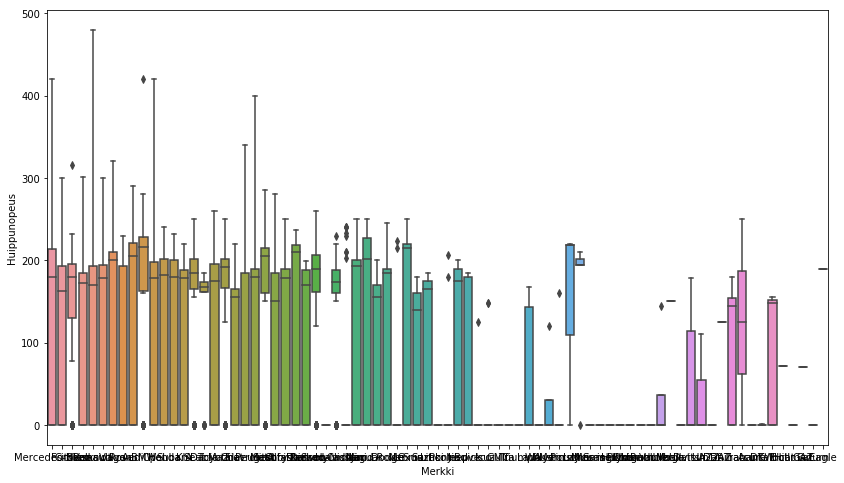

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.boxplot(x='Merkki', y='Huippunopeus', data=df[df['Huippunopeus'] < 500])

In [285]:
df_rmoutliers = df[df['Huippunopeus'] < 400]

In [286]:
df_rmoutliers = df_rmoutliers[df_rmoutliers['Huippunopeus'] > 60]

In [287]:
my_order = df_rmoutliers.groupby('Merkki').Huippunopeus.median().sort_values(ascending=False).iloc[::-1].index

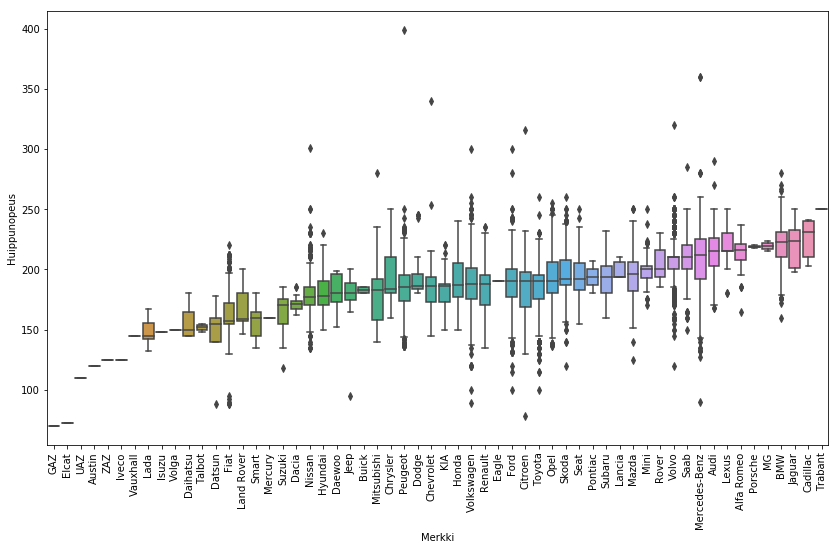

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
ax = sns.boxplot(x='Merkki', y='Huippunopeus', data=df_rmoutliers, order=my_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [289]:
df_kulutus = df[df['Kulutus/yhdistetty'] < 20]

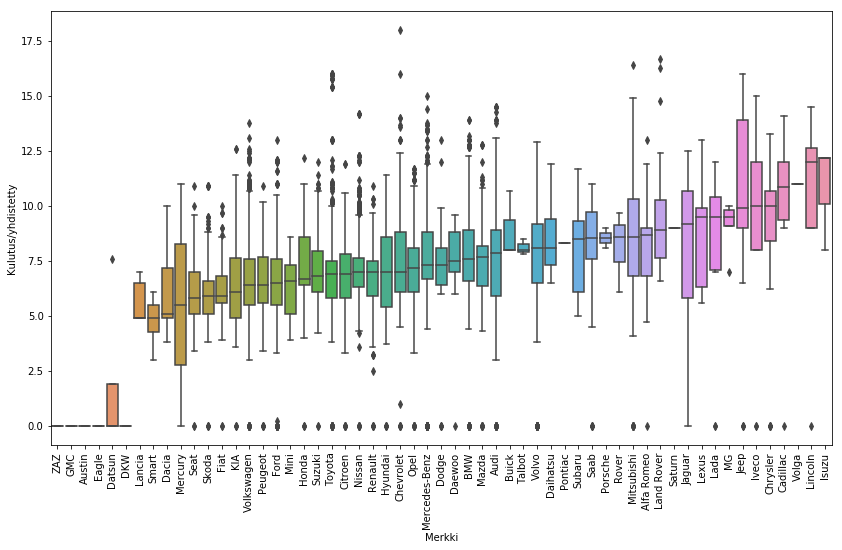

In [290]:
my_order = df_kulutus.groupby('Merkki')['Kulutus/yhdistetty'].median().sort_values(ascending=False).iloc[::-1].index

plt.figure(figsize=(14,8))
ax = sns.boxplot(x='Merkki', y='Kulutus/yhdistetty', data=df_kulutus, order=my_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [291]:
df_kiiht = df[df['Kiihtyvyys'] < 40]

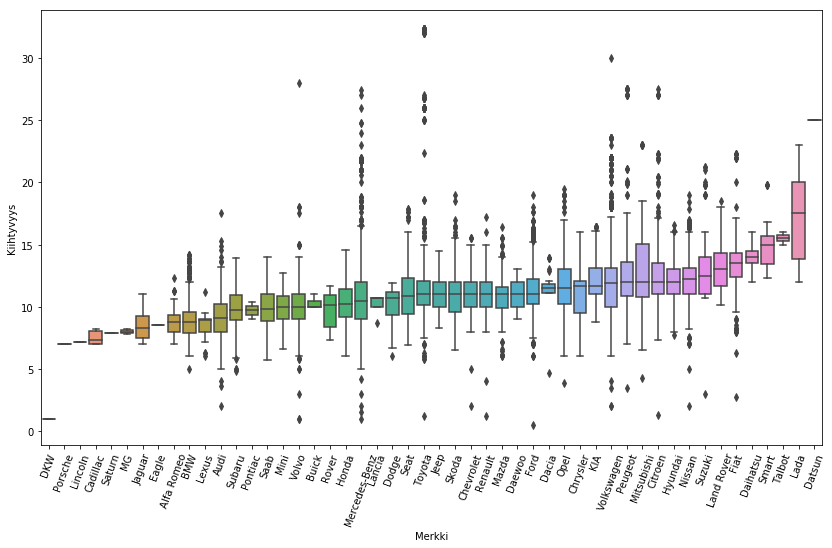

In [354]:
my_order = df_kiiht.groupby('Merkki')['Kiihtyvyys'].median().sort_values(ascending=False).iloc[::-1].index

plt.figure(figsize=(14,8))
ax = sns.boxplot(x='Merkki', y='Kiihtyvyys', data=df_kiiht, order=my_order)
ax.set_xticklabels(ax.get_xticklabels(),rotation=70)
plt.savefig('kiihtyvyys.png', dpi=200, bbox_inches='tight')
plt.show()

In [165]:
df.head()

,Merkki,Malli,Vuosimalli,Mittarilukema,Moottori,Vaihteisto,Teho,Huippunopeus,Kiihtyvyys,Kulutus/yhdistetty,Omamassa,Hinta,Moottorin tilavuus,Polttoaine,Teho/kW,Teho/hv
0,Mazda,MPV,2005.0,460000.0,"2.0 l, Diesel",Manuaali,100 kW / 136 Hv,0.0,NaN,NaN,NaN,400.0,2.0,Diesel,100.0,136.0
1,Nissan,Almera,1998.0,1600000.0,"1.6 l, Bensiini",Manuaali,74 kW / 101 Hv,180.0,11.0,6.7,1200.0,400.0,1.6,Bensiini,74.0,101.0
2,Nissan,Primera,2001.0,220000.0,"1.6 l, Bensiini",Manuaali,78 kW / 106 Hv,0.0,NaN,NaN,1125.0,400.0,1.6,Bensiini,78.0,106.0
3,Volkswagen,Passat,2000.0,367000.0,"1.6 l, Bensiini",Manuaali,Ei ilmoitettu/Ei ilmoitettu,0.0,NaN,NaN,NaN,300.0,1.6,Bensiini,0.0,0.0
4,Mazda,6,2002.0,325000.0,"1.8 l, Bensiini",Manuaali,88 kW / 120 Hv,197.0,10.7,8.3,1345.0,300.0,1.8,Bensiini,88.0,120.0


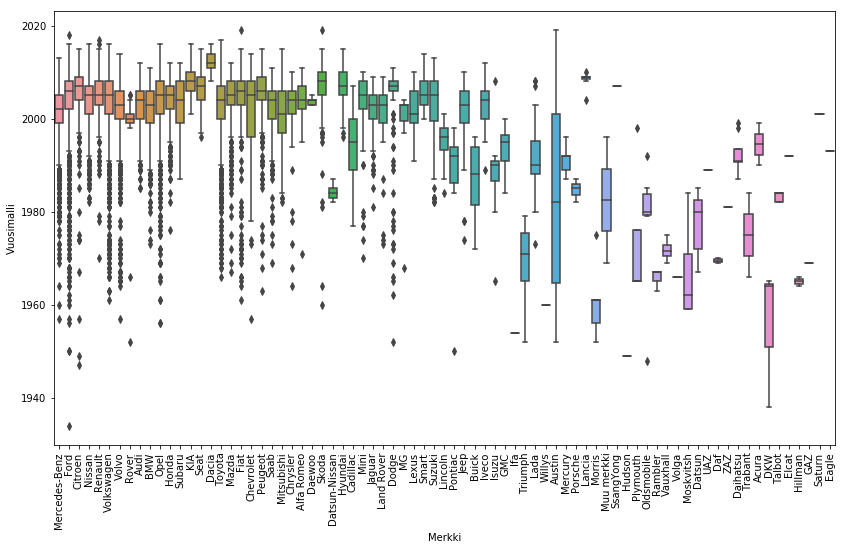

In [293]:
#my_order = df_kiiht.groupby('Merkki')['Kiihtyvyys'].median().sort_values(ascending=False).iloc[::-1].index

plt.figure(figsize=(14,8))
ax = sns.boxplot(x='Merkki', y='Vuosimalli', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

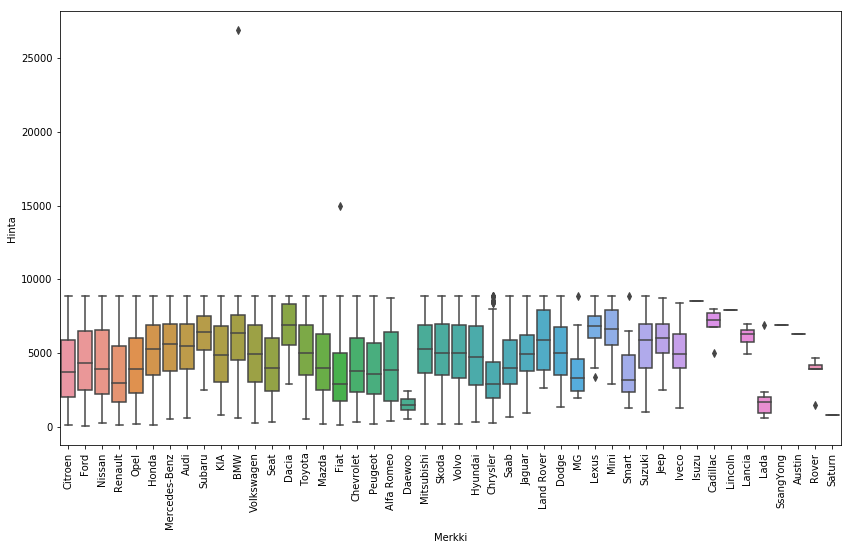

In [294]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='Merkki', y='Hinta', data=df[df['Vuosimalli'] > 2000])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

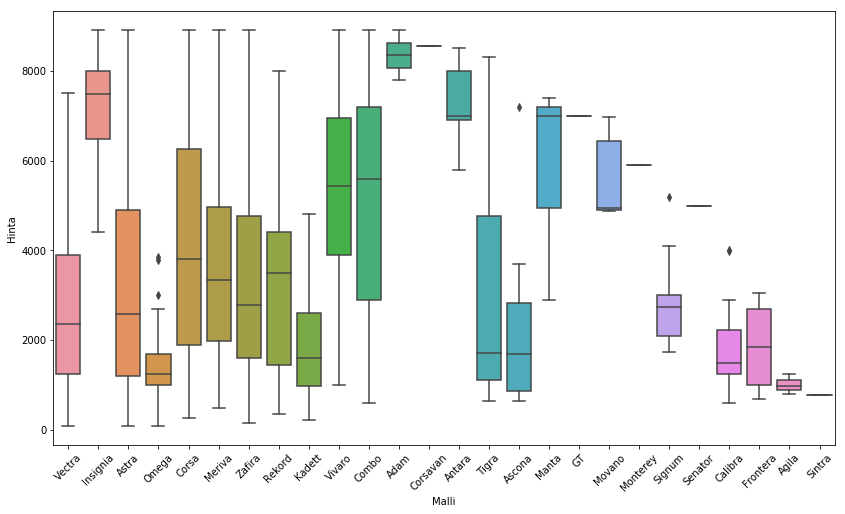

In [357]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='Malli', y='Hinta', data=df[df['Merkki'] == 'Opel'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

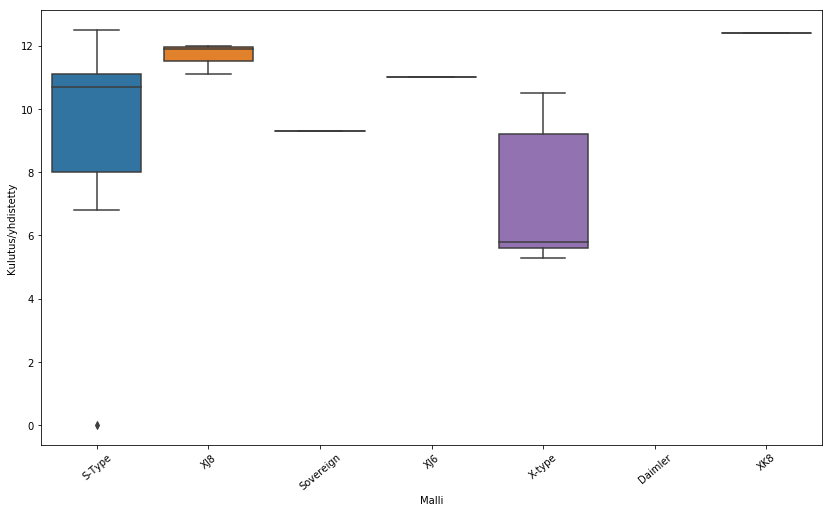

In [349]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='Malli', y='Kulutus/yhdistetty', data=df[df['Merkki'] == 'Jaguar'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40)
plt.show()

In [297]:
df.Merkki[2]

'Citroen'

In [298]:
df.Merkki.value_counts()

Volkswagen       3469
Mercedes-Benz    2582
Toyota           2287
Volvo            2252
Ford             2241
BMW              1802
Opel             1537
Audi             1442
Peugeot          1282
Nissan           1256
Citroen          1128
Skoda            1005
Renault           899
Honda             661
Mazda             654
Fiat              644
KIA               551
Hyundai           538
Mitsubishi        465
Chevrolet         456
Seat              447
Chrysler          415
Saab              395
Subaru            157
Dodge             152
Suzuki            151
Jeep              124
Mini              113
Alfa Romeo        108
Jaguar             94
                 ... 
Lancia              7
GMC                 7
Oldsmobile          6
Talbot              5
Mercury             5
Moskvitsh           5
Datsun-Nissan       5
Morris              5
Plymouth            5
Vauxhall            4
Austin              4
DKW                 3
Porsche             3
UAZ                 3
Rambler   

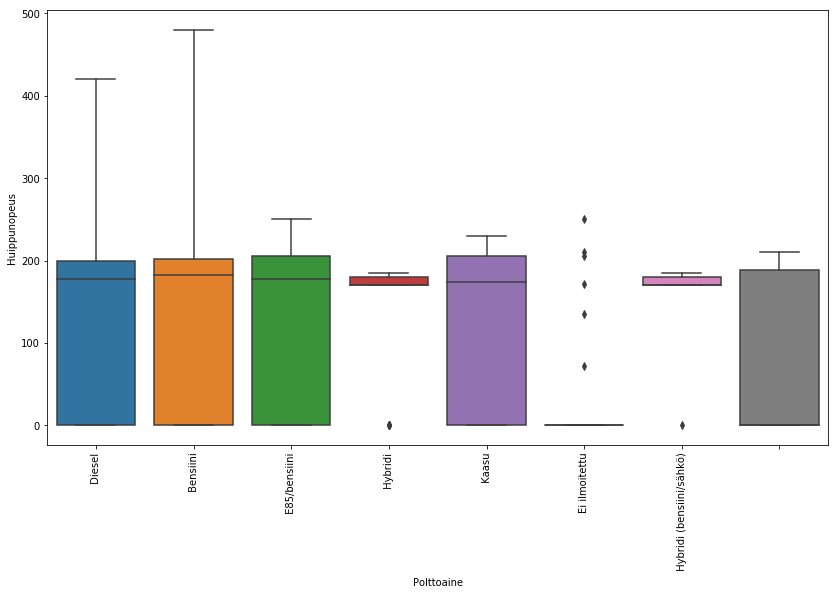

In [403]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='Polttoaine', y='Huippunopeus', data=df[df['Huippunopeus'] < 500])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [300]:
df_opel = df[df['Merkki'] == 'Opel']

In [301]:
df_opel['Malli'].value_counts()

Astra       497
Vectra      318
Zafira      130
Corsa       125
Vivaro      106
Insignia     73
Omega        72
Meriva       50
Combo        40
Kadett       24
Tigra        22
Signum       15
Rekord       11
Calibra      11
Antara       11
Ascona        7
Movano        7
Frontera      4
Manta         3
Agila         3
Sintra        2
Adam          2
GT            1
Monterey      1
Senator       1
Corsavan      1
Name: Malli, dtype: int64

In [302]:
df_opel_astra = df_opel[df_opel['Malli'] == 'Astra']

In [303]:
df_opel_astra.Hinta.mean()

3281.724346076459

In [304]:
df_opel_astra.Vuosimalli.mean()

2004.1750503018109

In [305]:
df_opel_astra_2004 = df_opel_astra[df_opel_astra['Vuosimalli'] == 2004]

In [307]:
df_opel_astra_2004.Hinta.mean()

2678.4615384615386

In [308]:
df_opel_astra_2004.Mittarilukema.mean()

218230.76923076922

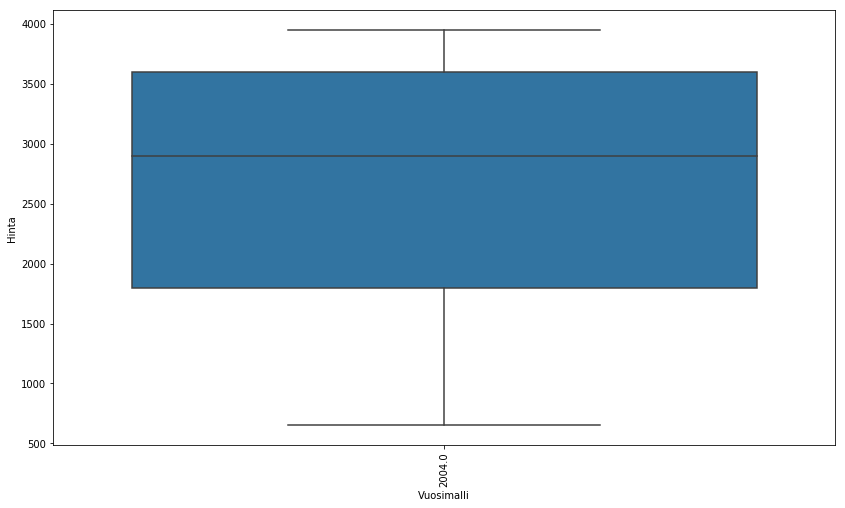

In [310]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(x='Vuosimalli', y='Hinta', data=df_opel_astra_2004)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [313]:
df_opel = df_opel[df_opel['Mittarilukema'] < 500000]

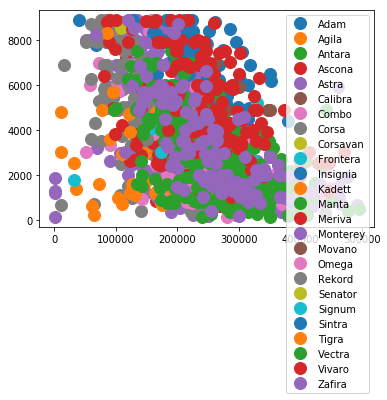

In [330]:
groups = df_opel.groupby('Malli')
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Mittarilukema, group.Hinta, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

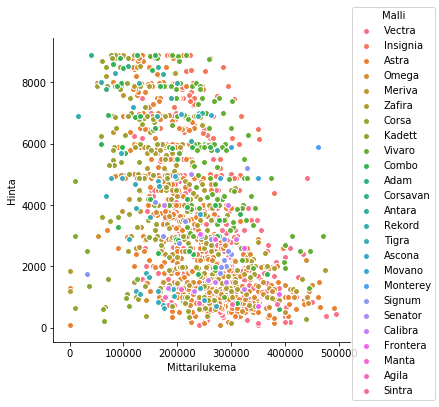

In [331]:
sns.pairplot(x_vars=["Mittarilukema"], y_vars=["Hinta"], data=df_opel, hue="Malli", size=5)

(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]), <a list of 9 Text xticklabel objects>)

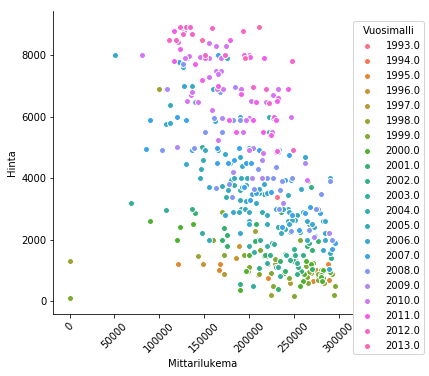

In [346]:
ax = sns.pairplot(x_vars=["Mittarilukema"], y_vars=["Hinta"], data=df_opel_astra[df_opel_astra['Mittarilukema'] < 300000], hue="Vuosimalli", size=5)
plt.xticks(rotation=45)

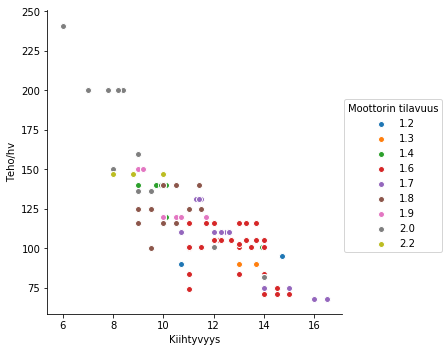

In [341]:
plt.figure(dpi=200)
sns.pairplot(x_vars=["Kiihtyvyys"], y_vars=["Teho/hv"], data=df_opel_astra, hue="Moottorin tilavuus", size=5)
plt.show()

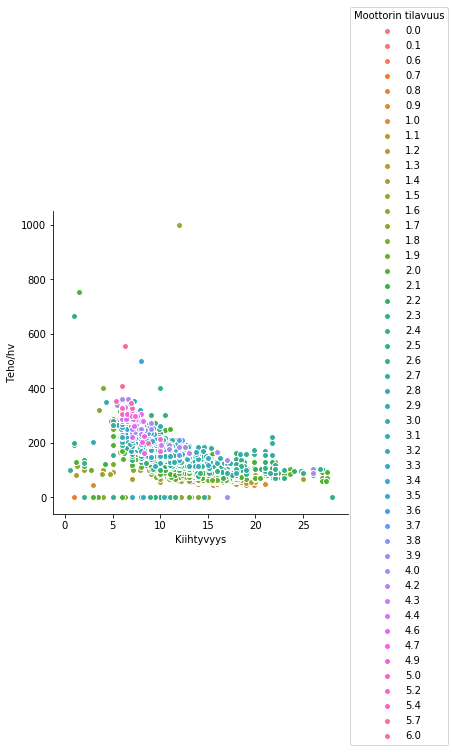

In [359]:
plt.figure(dpi=200)
sns.pairplot(x_vars=["Kiihtyvyys"], y_vars=["Teho/hv"], data=df[df['Kiihtyvyys']< 30], hue="Moottorin tilavuus", size=5)
plt.show()

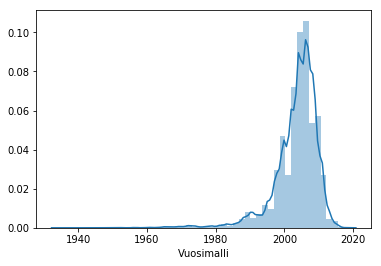

In [367]:
sns.distplot(df[df['Vuosimalli'] > 0]['Vuosimalli'])

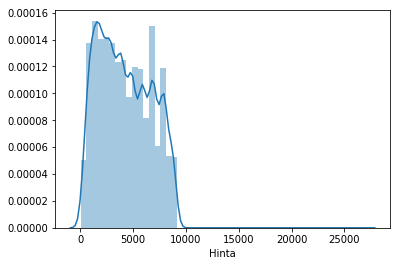

In [368]:
sns.distplot(df[df['Hinta'] > 0]['Hinta'])

In [378]:
df_opel_astra_2004.groupby(['Mittarilukema']).Hinta.mean()

Mittarilukema
174000.0    3400.0
180000.0    3950.0
183000.0    3780.0
190000.0    3600.0
191000.0    2990.0
192000.0    3700.0
200000.0    1800.0
206000.0    1600.0
215000.0    2900.0
220000.0    1800.0
232000.0    2400.0
324000.0    2250.0
330000.0     650.0
Name: Hinta, dtype: float64

In [381]:
import statsmodels.api as sm
opel_data_exog = sm.add_constant(df_opel_astra_2004['Mittarilukema'], prepend=False)
mod = sm.OLS(df_opel_astra_2004['Hinta'], opel_data_exog)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Hinta   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     9.890
Date:                Mon, 18 Feb 2019   Prob (F-statistic):            0.00933
Time:                        14:24:22   Log-Likelihood:                -103.81
No. Observations:                  13   AIC:                             211.6
Df Residuals:                      11   BIC:                             212.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Mittarilukema    -0.0137      0.004     -3.145

/home/pekka/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


In [398]:
print("Value of my car: {}".format(5678.2523-0.0137*152000))

Value of my car: 3595.8523


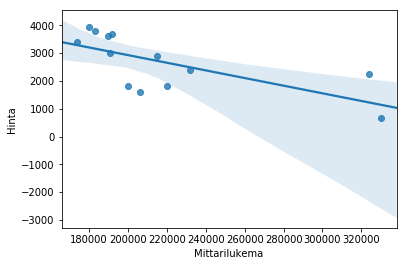

In [383]:
sns.regplot(x='Mittarilukema', y='Hinta', data=df_opel_astra_2004)

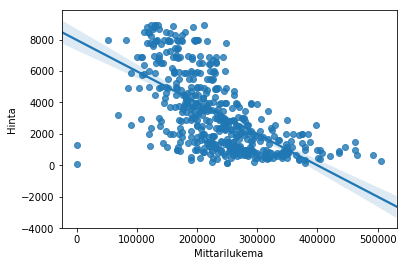

In [385]:
sns.regplot(x='Mittarilukema', y='Hinta', data=df_opel_astra[df_opel_astra['Mittarilukema']<1000000])

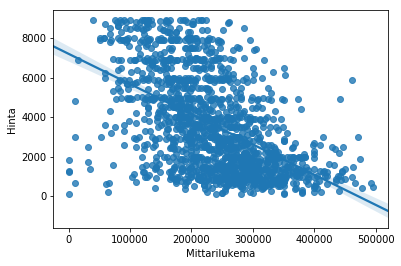

In [386]:
sns.regplot(x='Mittarilukema', y='Hinta', data=df_opel[df_opel['Mittarilukema']<1000000])

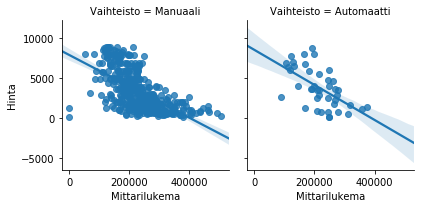

In [397]:
g = sns.FacetGrid(df_opel_astra[df_opel_astra['Mittarilukema']<1000000], col="Vaihteisto")
g.map(sns.regplot, "Mittarilukema", "Hinta")

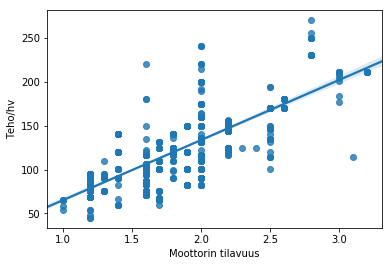

In [407]:
sns.regplot(x='Moottorin tilavuus', y='Teho/hv', data=df_opel[df_opel['Teho/hv'] > 0])

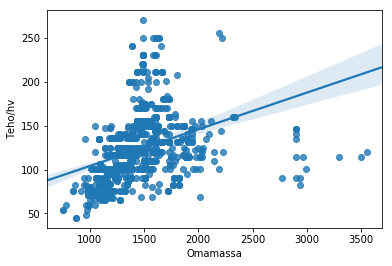

In [408]:
sns.regplot(x='Omamassa', y='Teho/hv', data=df_opel[df_opel['Teho/hv'] > 0])

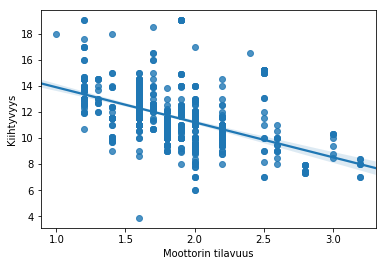

In [409]:
sns.regplot(x='Moottorin tilavuus', y='Kiihtyvyys', data=df_opel[df_opel['Kiihtyvyys'] > 0])